In [17]:
import pandas as pd
import sqlite3
from datetime import datetime
import requests
import time
import pandas as pd
import asyncio
from telegram import Bot
import matplotlib.pyplot as plt
import os
from datetime import datetime
from dotenv import load_dotenv
import psycopg2
from sqlalchemy import create_engine
import sqlite3
import asyncio
from telegram import Bot
from tabulate import tabulate

Matplotlib is building the font cache; this may take a moment.


In [ ]:
df = pd.read_json(r'C:\Users\55359\Documents\My Projects\pipeline-dados\Dados\dados_casa_moveis_decoracao.jsonl', lines=True, dtype={"preco_anterior": str, "fracao_preco_anterior":str, "preco_atual":str, "fracao_preco_atual":str})

In [19]:
def limpar_numero(valor):
    if pd.isnull(valor):
        return valor
    return int(str(valor).replace('.', '').replace(',', ''))

colunas_substituir_none = ['preco_anterior', 'fracao_preco_anterior', 'preco_atual', 'fracao_preco_atual']
df[colunas_substituir_none] = df[colunas_substituir_none].replace(['None', None], 0)

In [20]:
df["preco_anterior"] = df["preco_anterior"].apply(limpar_numero)
df["fracao_preco_anterior"] = df["fracao_preco_anterior"].apply(limpar_numero)
df["preco_atual"] = df["preco_atual"].apply(limpar_numero)
df["fracao_preco_atual"] = df["fracao_preco_atual"].apply(limpar_numero)

In [21]:
df['preco_anterior'] = df["preco_anterior"].astype(str) + "," + df["fracao_preco_anterior"].astype(str)
df['preco_atual'] = df["preco_atual"].astype(str) + "," + df["fracao_preco_atual"].astype(str)

df = df.drop(columns=['fracao_preco_anterior', 'fracao_preco_atual'])

In [22]:
df['porcentagem_desconto'] = df["porcentagem_desconto"].str.extract('(\d+)')
df['porcentagem_desconto'] = df['porcentagem_desconto'].fillna(0)
df['porcentagem_desconto'] = df['porcentagem_desconto'].astype(int)

df = df.sort_values('porcentagem_desconto', ascending=True)
df = df.drop_duplicates(subset=['titulo'], keep='last')
df['data_coleta']  = datetime.now()

Text(0.5, 0, 'Porcentagem de Desconto')

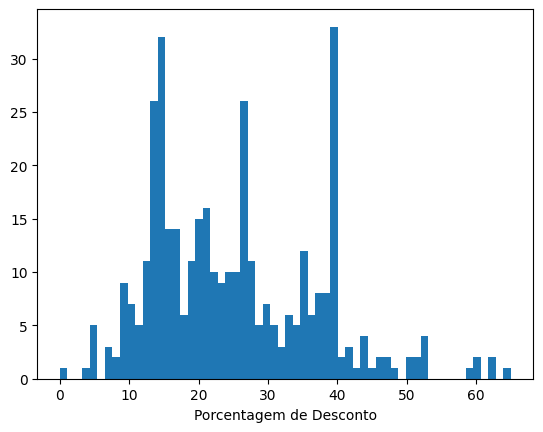

In [27]:
plt.hist(df['porcentagem_desconto'], bins=60)
plt.xlabel('Porcentagem de Desconto')

In [24]:
df.head()

,highlight,titulo,link,vendido_por,nota,total_avaliacoes,preco_anterior,preco_atual,porcentagem_desconto,detalhe_envio,detalhe_envio_2,data_coleta
507,None,Câmera Ip Wifi Icsee + Cartão De Memória Sd 64gb,https://produto.mercadolivre.com.br/MLB-312343...,None,NaN,NaN,"171,98","16,98",0,None,Chegará grátis amanhã sábado,2024-11-22 21:06:23.409306
115,MAIS VENDIDO,Varal De Luzes Festão 20 Mts Com 20 Lâmpadas I...,https://produto.mercadolivre.com.br/MLB-417369...,None,NaN,NaN,"169,55","160,55",4,None,Chegará grátis amanhã,2024-11-22 21:06:23.409306
447,MAIS VENDIDO,Conjunto 10 Potes 640ml Vidro Hermético 4 Trav...,https://www.mercadolivre.com.br/conjunto-10-po...,Por AURA DO BRASIL,NaN,NaN,"169,86","158,86",5,None,Chegará grátis amanhã sábado,2024-11-22 21:06:23.409306
104,MAIS VENDIDO,Árvore De Natal 210cm 1000 Galhos Pinheiro Lux...,https://www.mercadolivre.com.br/arvore-de-nata...,None,NaN,NaN,"397,90","378,0",5,Frete grátis,None,2024-11-22 21:06:23.409306
248,BLACK FRIDAY,Pisca Pisca Cascata 400 Led 10 Metros Luz Nata...,https://produto.mercadolivre.com.br/MLB-349211...,None,NaN,NaN,"78,99","75,4",5,None,Chegará amanhã,2024-11-22 21:06:23.409306
